## Python tools for Data Science - week 2 demos

This notebook contains notes on
1. Basic Python commands
2. lambda expressions
3. Reading large files
4. Series, Data Frames, Dictionaries
5. GroupBy operations
6. Filtering Examples

## Basic Python Constructs

### Reading/Writing Files

In [ ]:
# reading a file in python
with open('data/205_grades.csv') as f:
   read_data = f.read()
   print(read_data)
f.close()

In [ ]:
# writing to a file in python
f = open('DataSets/workfile', 'a')  # 'a' creates a new file if it does not exists
f.write('0123456789abcdef')
f.close()

## reading data from web

In [ ]:
import urllib.request
url="http://andyguna.com"
req=urllib.request.Request(url)
resp=urllib.request.urlopen(req)
data=resp.read()
print(data)

### Loops

In [ ]:
# loops in python
primes = [2, 3, 5, 7]
for prime in primes:
    print(prime)
 
# prints 0,1,..,4
for x in range(5):
    print(x)
    
# prints 3...9
for x in range(3,10):
    print(x)    

# prints all odd numbers less than 100 starting with 17
for x in range(17,100, 2):
    print(x)    

### Conditionals

In [ ]:
# conditional statements
x = 20
if x < 10:
    print ("less than 10")
elif x < 20:
    print ("between 10 and 19")
else:
    print ("more than 10")
    
# java/C   max = (a > b) ? a : b; 
# python code
a = 30
b = 20
max = a if (a > b) else b;
max


## lambda Expressions

In [ ]:
# lambda expression can take any number of arguments, but can have only one expression
power3 = lambda x : x**3
power3(2)

# lambda expressions can be hidden inside other functions.
def foo(x):
    return lambda y : y*x

#returns a lambda expression
func1 = foo(2)
func1(3)      # returns 2*3

# lambda expression can be applied to lists
A = [1,2,3,4]
# syntax for map : map(function, iterable, ...)
results = map(lambda x: x**2, A)
type(results)   # this is a map
# convert to list and print
print(list(results))


## Series, Data Frames, Panels and Dictionaries

## create a series

In [ ]:
import pandas as pd
import numpy as np
# create a series
s = pd.Series(['cat', 'dog', np.nan, 'rabbit'])

### create a dictionary

In [ ]:
 # create a dictionary
s.map({'cat': 'kitten', 'dog': 'puppy'})

### create dataframe

In [ ]:
import pandas as pd
from collections import OrderedDict
from datetime import date

# create a data frame
sales = [{'account': 'Jones LLC', 'Jan': 150, 'Feb': 200, 'Mar': 140},
         {'account': 'Alpha Co',  'Jan': 200, 'Feb': 210, 'Mar': 215},
         {'account': 'Blue Inc',  'Jan': 50,  'Feb': 90,  'Mar': 95 }]
df = pd.DataFrame(sales)
df['account']
df

In [ ]:
# lecture attendance
import pandas as pd
df = pd.read_csv("data/Attendance-Lectures_January 24, 2023_11.35.csv")
df

In [ ]:
# how many times me attended?
df.groupby('uid').get_group('adg133')

## Working with voter registrations

In [ ]:
import pandas as pd
df = pd.read_csv("data/Voter_Registration_Data.csv")
df

## Party Information

In [ ]:
# extract PARTY as a series
df_PARTY = df['PARTY']
type(df_PARTY)
df['PARTY'].value_counts()

### finding null values

In [ ]:
# how many null values are in the data frame
df.apply(lambda x: sum(x.isnull()), axis=1)    # column sum of null values (processed by rows)
df.apply(lambda x: sum(x.isnull()), axis=0)  # row sum of null values (processed by columns)
null_values = df.apply(lambda x: sum(x.isnull()), axis=0)
null_values

### Remove null rows/columns

In [ ]:
# if the number of null values (row order) is less than 5% of the rows/observations drop the row that 
# contains the null value
if (null_values < df.shape[0]*0.05):
    df = df.dropna(axis=0)
df.shape[0]                    # now 1 less than original

# Find critical information about dataframe

In [ ]:
df.info()

In [ ]:
# index of the dataframe
df.index

In [ ]:
# shape of the dataframe
df.shape    # use df.shape[0] to get rows and [1] to get columns

In [ ]:
# the columns of the data frame
df.columns

## sort information

In [ ]:
df.sort_values('COUNT(V.ID)', ascending=True)

## pick specific rows and columns

In [ ]:
df.loc[3:5,'COUNT(V.ID)']    #rows that are indexed from 3 to 5  - SERIES OUTPUT
df.loc[3:5]                  # gives the dataframe

## Group by Operation (creating, printing)

In [ ]:
df_grp = df.groupby('PARTY')
type(df_grp)
for key, value in df_grp:
    print(df_grp.get_group(key), "\n\n")
    
df_grp.get_group('Libertarian')

## Filter information

In [ ]:
# Create a new dataframe that only contains party and county information
df_new = df[['PARTY','COUNT(V.ID)']]
df_new
# Create a new dataframe that contains independents from county ID  > 50 
df_new_1 = df_new.loc[(df_new['PARTY']=='Independent Party') & (df_new['COUNT(V.ID)'] > 50)]
df_new_1

# Data frame memory usage

In [ ]:
print(df.memory_usage(deep=False))
print(df.memory_usage(deep=True))

In [ ]:
34848*8

## Indices

In [ ]:
import pandas as pd
elections = pd.DataFrame({'candidate':['obama','mccain','obama','romney','clinton','trump'],
                         'party':['democratic','republican','democratic','republican','democratic','republican'],
                         'percent':[52.9,45.7,51.1,47.2,48.2,46.1],
                         'year':[2008,2008,2012,2012,2016,2016],
                         'results':['win','loss','win','loss','loss','win']})
elections

# indexed by year
ind_year = pd.DataFrame({'candidate':['obama','mccain','obama','romney','clinton','trump'],
                         'party':['democratic','republican','democratic','republican','democratic','republican'],
                         'percent':[52.9,45.7,51.1,47.2,48.2,46.1],
                         'results':['win','loss','win','loss','loss','win']}, index=[2008,2008,2012,2012,2016,2016])
print(ind_year)

# Access columns
ind_year['candidate']
# access rows
ind_year.loc[2008]

In [ ]:
# who won the election with less than 50%?
elections.loc[(elections['results'] == 'win') & (elections['percent'] < 50), 'candidate':'results']

### Weirdly indexed Data Frames

In [ ]:
weird = pd.DataFrame({1:["me","him"], "1":["you","them"]})
weird[1:]
weird[1]
weird["1"]

## loc and iloc

In [ ]:
import pandas as pd
candidates = pd.DataFrame({'candidate':['obama','mccain','obama','romney','clinton','trump'],
                         'party':['democratic','republican','democratic','republican','democratic','republican'],
                         'percent':[52.9,45.7,51.1,47.2,48.2,46.1],
                         'year':[2008,2008,2012,2012,2016,2016],
                         'results':['win','loss','win','loss','loss','loss']})
print(candidates)
candidates.loc[[1,3,5], ['party']]
#candidates.loc[(candidates['results'] == 'loss') & (candidates['percent']<50), 'candidate':'year']
#candidates.iloc[0:2,0:]
#candidates.sort_values('percent', ascending=False)
#candidates.sort_values('percent', ascending=False)

## Merging Data Frames

### Inner join (intersect)
Join two tables where we only return the rows where the two joined columns contain the same valueS

In [ ]:
import pandas as pd
left = pd.DataFrame({'netID': ['adg133','abc123'], 'midterm': [65,45]})
right = pd.DataFrame({'netID': ['adg133'], 'final': [80]})
print(left)
print(right)
common = pd.merge(left,right, on='netID')
print(common)


### Outer join (union)
Return all rows from both left and right join

In [ ]:
import pandas as pd
left = pd.DataFrame({'netID': ['adg133','abc123'], 'midterm': [65,45]})
right = pd.DataFrame({'netID': ['adg133'], 'final': [80]})
common = pd.concat([left,right])
common

### Left join
Keep all rows of the left table, add entries from right table that match the corresponding columns

In [ ]:
import pandas as pd
left = pd.DataFrame({'netID': ['adg133','abc123'], 'midterm': [65,45]})
right = pd.DataFrame({'netID': ['adg133'], 'final': [80]})
common = pd.merge(left,right, how ="left")
common

### Right join
Like a left join but with the roles of the tables reversed

In [ ]:
import pandas as pd
left = pd.DataFrame({'netID': ['adg133','abc123'], 'midterm': [65,45]})
right = pd.DataFrame({'netID': ['adg133'], 'final': [80]})
common = pd.merge(left,right, how ="right")
common

# Interview question
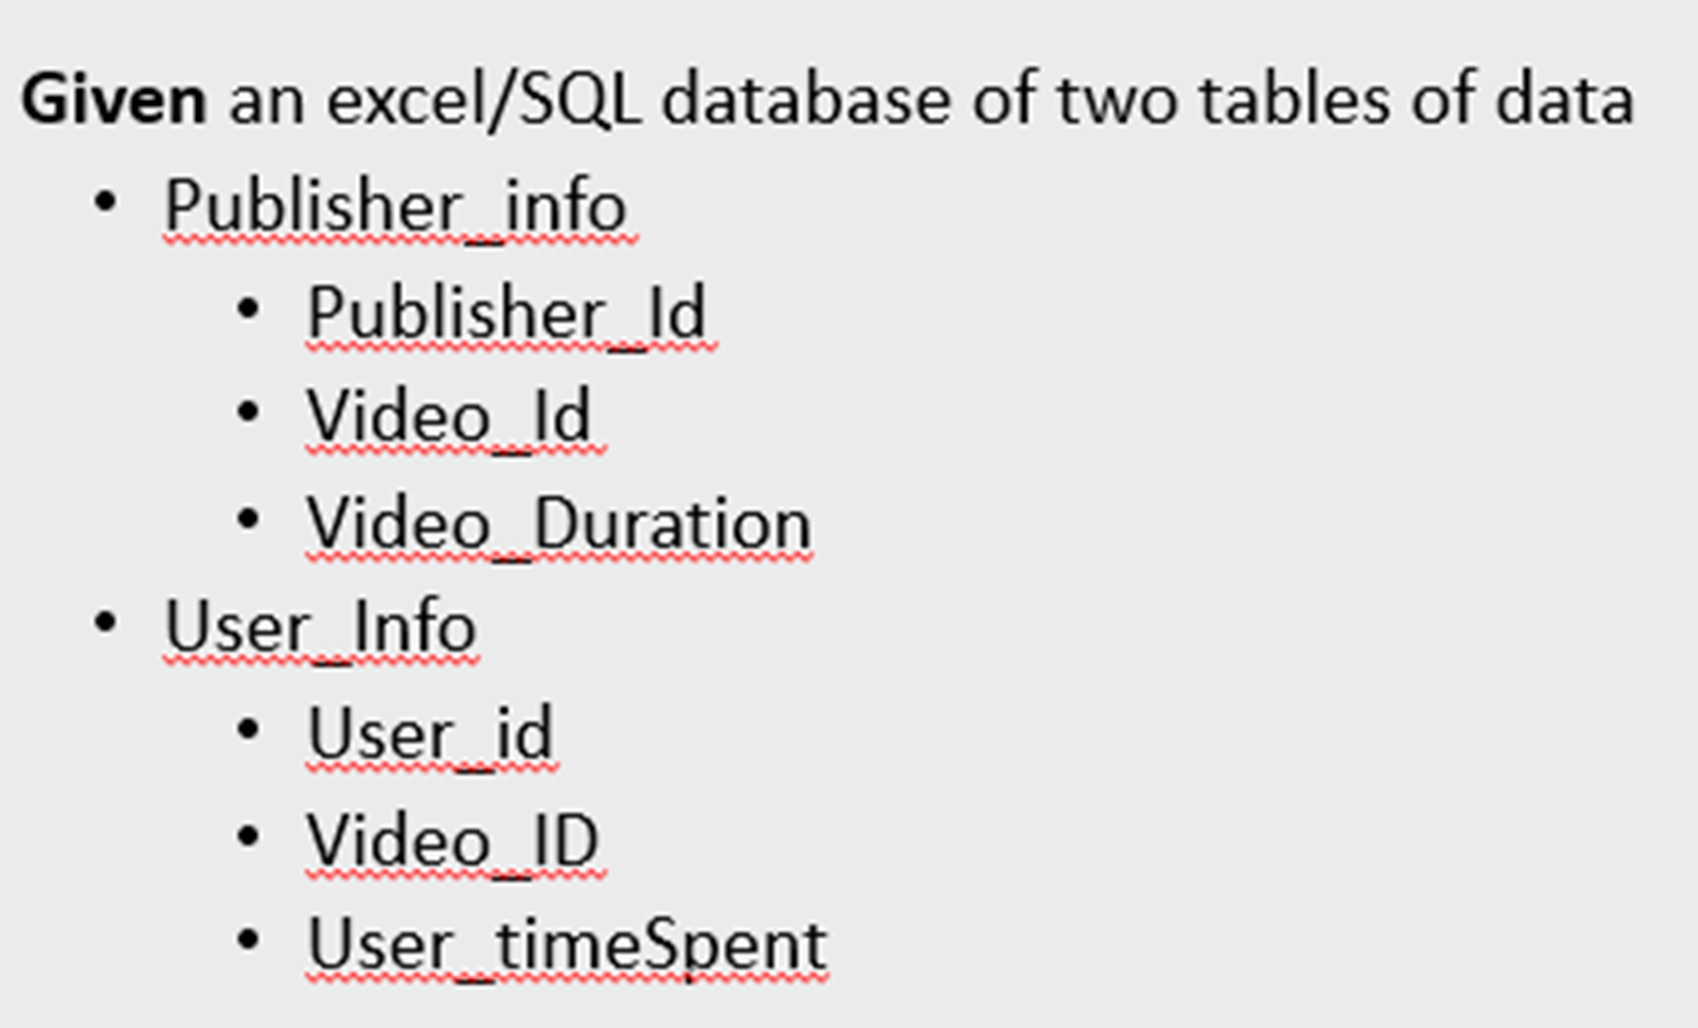

Question 1. How many minutes worth of videos the average publisher have?

Question 2. How many publishers have at least one user who watched their videos?





In [ ]:
import pandas as pd
df_publisher = pd.read_csv('data/video_publisher.csv')
df_user = pd.read_csv('data/video_user.csv')
df_publisher
#df_user

### Question 1. How many minutes worth of videos the average publisher have?

In [ ]:
# Question 1. How many minutes worth of videos the average publisher have?
df_pubgrp = df_publisher.groupby('publisher_id')
for key, item in df_pubgrp:
    print(df_pubgrp.get_group(key))

import numpy as np 
df_pubgrp.agg(np.sum).agg(np.average)

### Question 2. How many publishers have at least one user who watched their videos?

In [ ]:
# Question 2. How many publishers have at least one user who watched their videos?
#common = pd.merge(df_user,df_publisher, on='video_id')
#print(common)
#print(df_publisher.merge(df_user))
df_grp = df_publisher.merge(df_user).groupby('publisher_id')
for key, value in df_grp:
    print(key , ' ' , df_grp.get_group(key).shape[0])
    
## COMPLETE THE CODE

## Dictionaries

In [ ]:
df = pd.DataFrame({'col1': [1, 2],'col2': [3, 4]}, index=['row1', 'row2'])
dict = df.to_dict()
df['col1']
dict

In [ ]:
# Another look at Dictionaries
food = {"ham" : "yes", "egg" : "yes", "spam" : "no" }
food["spam"]
for key in food:
    print (key)
#food["bacon"]     # non-existing key - error message
w = food.copy()  # duplicate the dictionary
w
w.clear()     # clear content

## Reading Large Files

In [ ]:
# READING LARGE FILES IN PYTHON
input = open('data/Voter_Registration_Data.csv','r')

# read the first 10 lines
for lines in range(10):
    line = input.readline()
    #print(line)
    

# read the large file 10 lines at a time
input = open('data/Voter_Registration_Data.csv','r')
 
while(1):
    for lines in range(10):
        print (input.readline())
    print ("Received 10 lines")

## Boolean Arrays
Used to select rows that satistfy a certain criteria

In [ ]:
import pandas as pd
df = pd.read_csv('data/Voter_Registration_Data.csv')
df.head()
df[df['COUNTY']=='DOUGLAS']

## Grouping and Filtering

### Read Data

In [ ]:
import numpy as np
import pandas as pd
# this is the voter registration data file from Oregon 
# (https://catalog.data.gov/dataset?tags=elections)
df = pd.read_csv("data/Voter_Registration_Data.csv")
df.head()

### Group by a Key

In [ ]:
# group the records by COUNTY
grp_county = df.groupby('COUNTY')
print(type(grp_county))
#for key, value in grp_county:
#    print(grp_county.get_group(key), "\n\n")

grp_baker = grp_county.get_group('BAKER')

# how many democrats are in BAKER county?
grp_baker_democrats = grp_baker.groupby('PARTY').get_group('Democrat')
grp_baker_democrats.size

# exercise: Find the total democrats in House District 01
grp_district = df.groupby('HD_NAME')
grp_district.get_group('House District 01').groupby('PARTY').get_group('Democrat').info()

In [ ]:
# lets take a look at a way to plot dictionaries by key and values
# what is the distribution of the party?

def count_elements(seq) -> dict:
     hist = {}
     for i in seq:
         hist[i] = hist.get(i, 0) + 1
     return hist

counted = count_elements(df['PARTY'])
print(counted)

# plot the dictionary 
import matplotlib.pyplot as plt

plt.bar(range(len(counted)), counted.values(), align='center')
plt.xticks(range(len(counted)), list(counted.keys()))
plt.show()


In [ ]:
percent_grouped_by_party = df['CD_CODE'].groupby(df['PARTY'])
type(percent_grouped_by_party)
print(percent_grouped_by_party)

As we see, percent_grouped_by_party is NOT a familiar object like a DataFrame, Series, or Index. Instead, it's a SeriesGroupBy object. A SeriesGroupBy consists of groups, one for each of the distinct values of the Party column. If we ask to see these groups, we'll be able to see which indices in the original DataFrame correspond to each group.

In [ ]:
percent_grouped_by_party.groups

In [ ]:
# let us group the midterm grades by recitation in CS 205
df = pd.read_csv("205_grades.csv")
df.head()

In [ ]:
percent_grouped_by_party = df['midterm'].groupby(df['Recitation'])
type(percent_grouped_by_party)

In [ ]:
percent_grouped_by_party.groups

In [ ]:
# find the mean midterm score of each recitation
percent_grouped_by_party.mean()

In [ ]:
# find the max midtrem score of each recitation
percent_grouped_by_party.max()

In [ ]:
percent_grouped_by_party.min()

In [ ]:
percent_grouped_by_party.size()

In [ ]:
percent_grouped_by_party.first()

In [ ]:
# find the sum of all the midterm scores for the recitations
percent_grouped_by_party.sum()

In [ ]:
# We can iterate over a SeriesGroupBy object -- though we're doing this just for educational purposes 
# and you'll probably never actually do this with a real SeriesGroupBy. As we iterate we get pairs of 
# (name, group), where name is a String label for the group, and group is a Series corresponding to the 
# all the values from the given group.

from IPython.display import display  # like print, but for complex objects

for name, group in percent_grouped_by_party:
    print('Recitation:', name)
    print(type(group))
    #display(group)

In [ ]:
# aggregation by multiindex
everything_grouped_by_recitation_and_midterm = df.groupby([df['Recitation'], df['midterm']])
everything_grouped_by_recitation_and_midterm.mean()

# Study of the salon video data
In this study we will look at weekly raw data files imported from salon.cs.princeton.edu 

In [ ]:
## import numpy as np
import pandas as pd
# import salon raw data files
df = pd.read_csv('data/watches_range_02_06_to_02_12.txt', sep="|", 
                 names=["date", "time", "timestamp", "speed", "poll", "videoid", "userid", "salonid", "NA"])
df['userid'].value_counts()



In [ ]:
df['userid'].unique()
df['userid'].value_counts()
df['videoid'].value_counts()

In [ ]:
df['userid'].groupby

# cover filter function here

In [ ]:
grouped_df = df['date'].groupby(df['userid'])
for key, item in grouped_df:
    print(grouped_df.get_group(key), "\n\n")

## More Class work
Using the voter registration database, find the following.
Create a new dataframe that only contains party and county (COUNT(V.ID)) information
Create a new dataframe that contains independents from county ID  > 50 
Sort the values by COUNT(V.ID) in descending order

In [ ]:
import numpy as np
import pandas as pd
df = pd.read_csv("data/Voter_Registration_Data.csv")
df.head()

In [ ]:
df_party_county = df[['COUNT(V.ID)','PARTY']]
df_party_county 

In [ ]:
df_tmp = df_party_county[df_party_county['COUNT(V.ID)'] > 50].groupby('PARTY')

In [ ]:
df_tmp.get_group('Independent Party').sort_values('COUNT(V.ID)', ascending = False)